# Necessary Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt


In [35]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

___
RandomHorizontalFlip randomly flips an image with a probability of 50%, and RandomCrop pads an image by 4 pixel on each side then randomly crops 32x32 from the image after padding. We add such transformations to add noise to the data and prevent our model from overfitting. There are also other transformations you can use such as ColorJitter and RandomVerticalFlip etc. but I found these to be sufficient for our purposes. <br />

ToTensor simply converts the image to a Tensor. Since its a coloured image, it would have 3 channels (R,G,B) so the Tensor would be of size 3x32x32. <br/>

Normalize takes the mean and standard deviation for each channel of the entire dataset as input. Normalizing scales our data to a similar range of values to make sure that our gradients don’t go out of control.
Now we just prepare our train and test dataset and then we can explore the data.
___

# Loading Data

In [36]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

Files already downloaded and verified


In [37]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 1.9425,  2.1960,  2.3910,  ...,  2.4495,  2.4495,  2.4495],
         [ 1.3380,  1.6890,  2.2935,  ...,  2.4300,  2.4300,  2.4300],
         [ 1.2405,  1.7670,  2.2740,  ...,  2.4300,  2.4495,  2.4495],
         ...,
         [-1.6846, -0.3976, -0.1050,  ...,  0.2460,  0.2070,  0.0900],
         [-1.9381, -0.7486, -0.2806,  ..., -0.1831, -0.0660, -0.5926],
         [-2.1526, -1.0411, -0.3196,  ..., -0.8071, -0.5536, -0.8656]],

        [[ 2.2872,  2.5241,  2.5833,  ...,  2.5833,  2.5833,  2.5833],
         [ 1.7149,  2.0307,  2.5241,  ...,  2.5636,  2.5636,  2.5636],
         [ 1.6557,  2.1294,  2.5043,  ...,  2.5636,  2.5833,  2.5833],
         ...,
         [-1.8179, -0.4166,  0.0176,  ...,  1.1426,  1.0833,  0.9649],
         [-2.0547, -0.6534,  0.1952,  ...,  0.6097,  0.7084,  0.2150],
         [-2.2718, -0.9100,  0.3136,  ..., -0.0416,  0.1952, -0.1403]],

        [[ 2.3533,  2.7019,  2.7600,  ...,  2.7600,  2.7600,  2

In [38]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [39]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

# BATCHSIZE & DataLoader

In [40]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

# Visualization

# Get CUDA ready

In [41]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device
        
    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)
            
    def __len__(self):
        return len(self.data)


In [42]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is available!


In [43]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.cuda.is_available())  # Check if CUDA is available
print(torch.cuda.get_device_name(0))  # Check the name of the GPU


1.13.1+cu117
True
NVIDIA GeForce RTX 4090


In [44]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [45]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

# BaseModel

In [46]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [48]:
#model = ResNet(3,100)

In [49]:
#model = to_device(model, device)

In [50]:
from torchvision import models

class ResNet101Model(BaseModel):
    def __init__(self, num_classes):
        super().__init__()
        self.model = models.resnet101(pretrained=True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

In [51]:
model = ResNet101Model(num_classes=100)
model = to_device(model, device)

# Evaluation & Fit Function for Training

In [52]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [53]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()
    
    history = []
    
    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)
    
    scheduler = scheduler(optimizer, T_max=epochs * len(train_dl))

    #one cycle LR
    #scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))

    
    for epoch in range(epochs):
        model.train()
        
        train_loss = []
        
        lrs = []
        
        for batch in train_dl:
            loss = model.training_step(batch)
            
            train_loss.append(loss)
            
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs
        
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

In [54]:
epochs = 200
optimizer = torch.optim.Adam
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR

# Training

In [55]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model, 
              optimizer=optimizer, max_lr=max_lr,
              weight_decay=weight_decay, scheduler=scheduler)

Epoch [0], last_lr: 0.00050, train_loss: 2.6364, val_loss: 2.1570, val_acc: 0.4466
Epoch [1], last_lr: 0.00050, train_loss: 2.1420, val_loss: 1.8864, val_acc: 0.4927
Epoch [2], last_lr: 0.00050, train_loss: 1.8076, val_loss: 22.0503, val_acc: 0.2964
Epoch [3], last_lr: 0.00050, train_loss: 2.0947, val_loss: 1.8273, val_acc: 0.5225
Epoch [4], last_lr: 0.00050, train_loss: 1.6781, val_loss: 1.7606, val_acc: 0.5458
Epoch [5], last_lr: 0.00050, train_loss: 1.5450, val_loss: 2.9955, val_acc: 0.5509
Epoch [6], last_lr: 0.00050, train_loss: 1.4839, val_loss: 2.4391, val_acc: 0.5627
Epoch [7], last_lr: 0.00050, train_loss: 1.3231, val_loss: 2.5066, val_acc: 0.5750
Epoch [8], last_lr: 0.00050, train_loss: 1.2362, val_loss: 1.7421, val_acc: 0.5862
Epoch [9], last_lr: 0.00050, train_loss: 1.2065, val_loss: 1.6252, val_acc: 0.5668
Epoch [10], last_lr: 0.00050, train_loss: 1.2111, val_loss: 2.3240, val_acc: 0.5669
Epoch [11], last_lr: 0.00050, train_loss: 1.1058, val_loss: 1.5355, val_acc: 0.5882
E

# Plotting

In [56]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])
    
def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

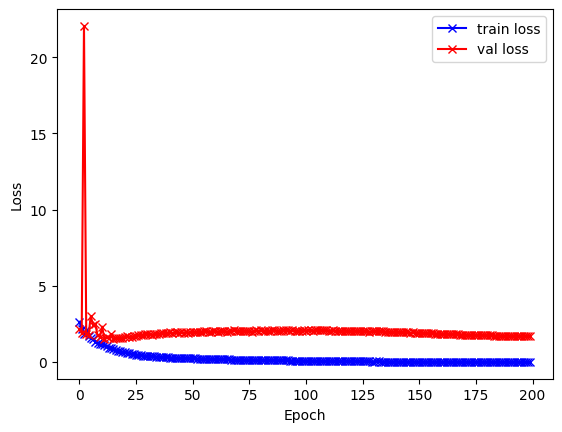

In [57]:
plot_loss(history)

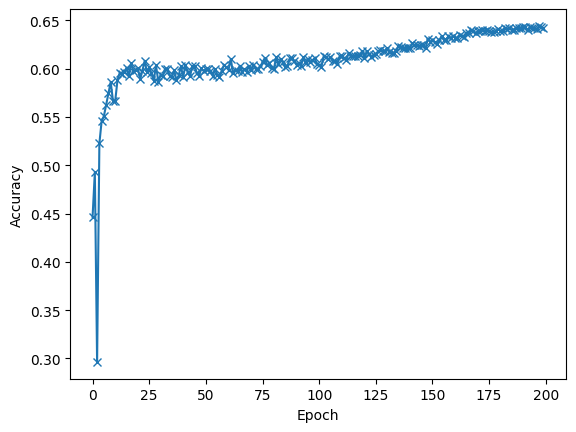

In [58]:
plot_acc(history)

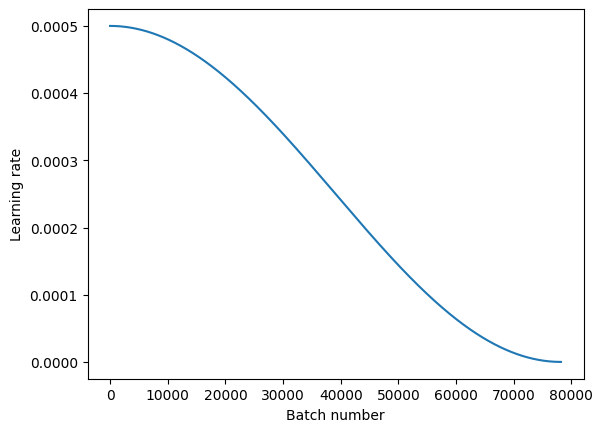

In [59]:
plot_lrs(history)

# Make predictions and see the image with its result


In [60]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: mountain , Predicted: road


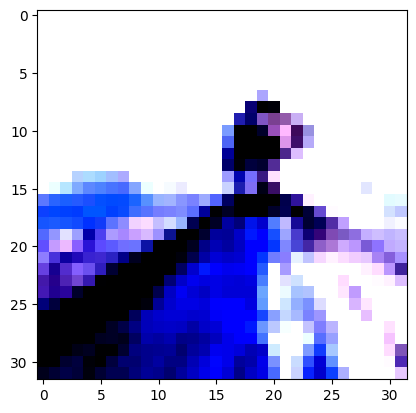

In [61]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


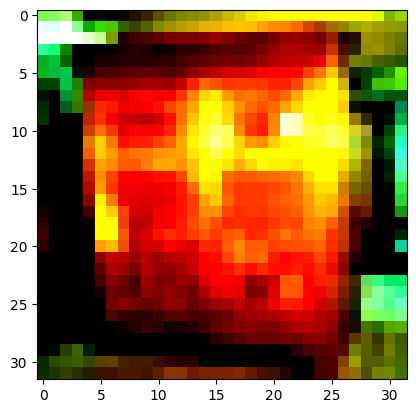

In [62]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

# Save

In [63]:
torch.save(model.state_dict(), 'adam_pretrained.pth')

In [64]:
print("finish")

finish


In [65]:
def test_accuracy(model, test_data):

    correct = 0
    for image, label in test_data:
        
        y = predict_image(image, model)
        if y == test_data.classes[label]:
            correct += 1

    return correct/len(test_data)
    

In [66]:
test_accuracy(model, test_data)

0.6424